<a href="https://colab.research.google.com/github/vkekd25/Sc2_Project/blob/main/Sc2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Olist's Business Model**

**Olist는 전자 상거래 부문에서 운영되는 브라질 백화점(마켓플레이스)이지만 전자 상거래 자체는 아닙니다(그녀가 말했듯이). 2015년부터 SaaS(Software as a Service) 기술 회사로 운영하고 있습니다. 모든 규모(및 대부분의 부문)의 상점 주인에게 시장 솔루션(전자 상거래 부문)을 제공하여 온라인 존재 여부에 관계없이 매출 증대**

#**Olist Solution**
**Olist의 솔루션은 소프트웨어, 주요 시장과의 계약 및 평판 공유의 세 가지 측면으로 구성됩니다. 아래 다이어그램은 Olist가 시장, 소비자(포르투갈어: consumidores) 및 소매업체(포르투갈어: varejistas)를 연결하는 방법을 보여줍니다.**

**...은(는) 시장 내의 대형 백화점입니다.  
… 브라질의 주요 전자 상거래와 연결되어 있습니다.  
... 제품을 구매하지 않습니다.  
... 제품을 재고로 보관하지 않습니다.  
... 매장에서 제공되는 제품의 배송을 수행하지 않습니다.  
모든 제품은 Olist를 통해 판매하는 수천 명의 상점 주인(Olist*에 등록됨)이 판매 및 배송합니다.  
그녀의 강점은 실제 제품을 판매하는 모든 참여 상점 주인의 연합에 있습니다.  
참여 상점 주인은 제품을 분리, 포장 및 물류 운영자에게 가져갈 책임이 있습니다.**

**Customer ID: 고객 Id      
Customer Unique ID: 고객 고유 Id    
Customer Zip Code prefix: 고객 Zip Code  
Customer City: 고객 사는 도시  
Customer State: 고객 사는 주  
Geolocation Zip Code prefix: 지리적 위치 우편번호  
Geolocation Lat: 지리적 위치 위도   
Geolocation Lng: 지리적 위치 경도  
Geolocation City: 지리적 위치 도시  
Geolocation State: 지리적 위치 주  
Order ID: 주문 ID  
Order Item ID: 주문 아이템 ID  
Seller ID: 판매자 ID  
Shipping limit date: 배송 제한 날짜    
Price:  가격 
Freight Value: 운임 가치     
Payment Sequential:  결제 순차   
Payment Type: 지불 유형  
Payment Installments 분할 납부    
Payment Value: 지불 가치   
Product ID: 제품 ID  
Product Category name: 제품 카테고리 이름    
Product Name length: 상품명 길이    
Product Photos (quantity): 제품 사진(수량)    
Product Weight (grams): 제품 무게(그램)  
Product Length (cm): 제품 길이(cm)    
Product Height (cm): 제품 높이(cm)    
Product Width (cm): 제품 너비(cm)    
Review ID: 리뷰 ID    
Review Score: 리뷰 점수    
Review Comment title: 리뷰 댓글 제목    
Review Comment message: 리뷰 댓글 메시지  
Review Creation date: 리뷰 작성 날짜  
Review Answer timestamp: 리뷰 답변 타임스탬프  
Seller ID: 판매자 ID  
Seller Zip Code: 판매자 우편번호  
Seller City: 판매자 도시  
Seller State: 판매자 주**

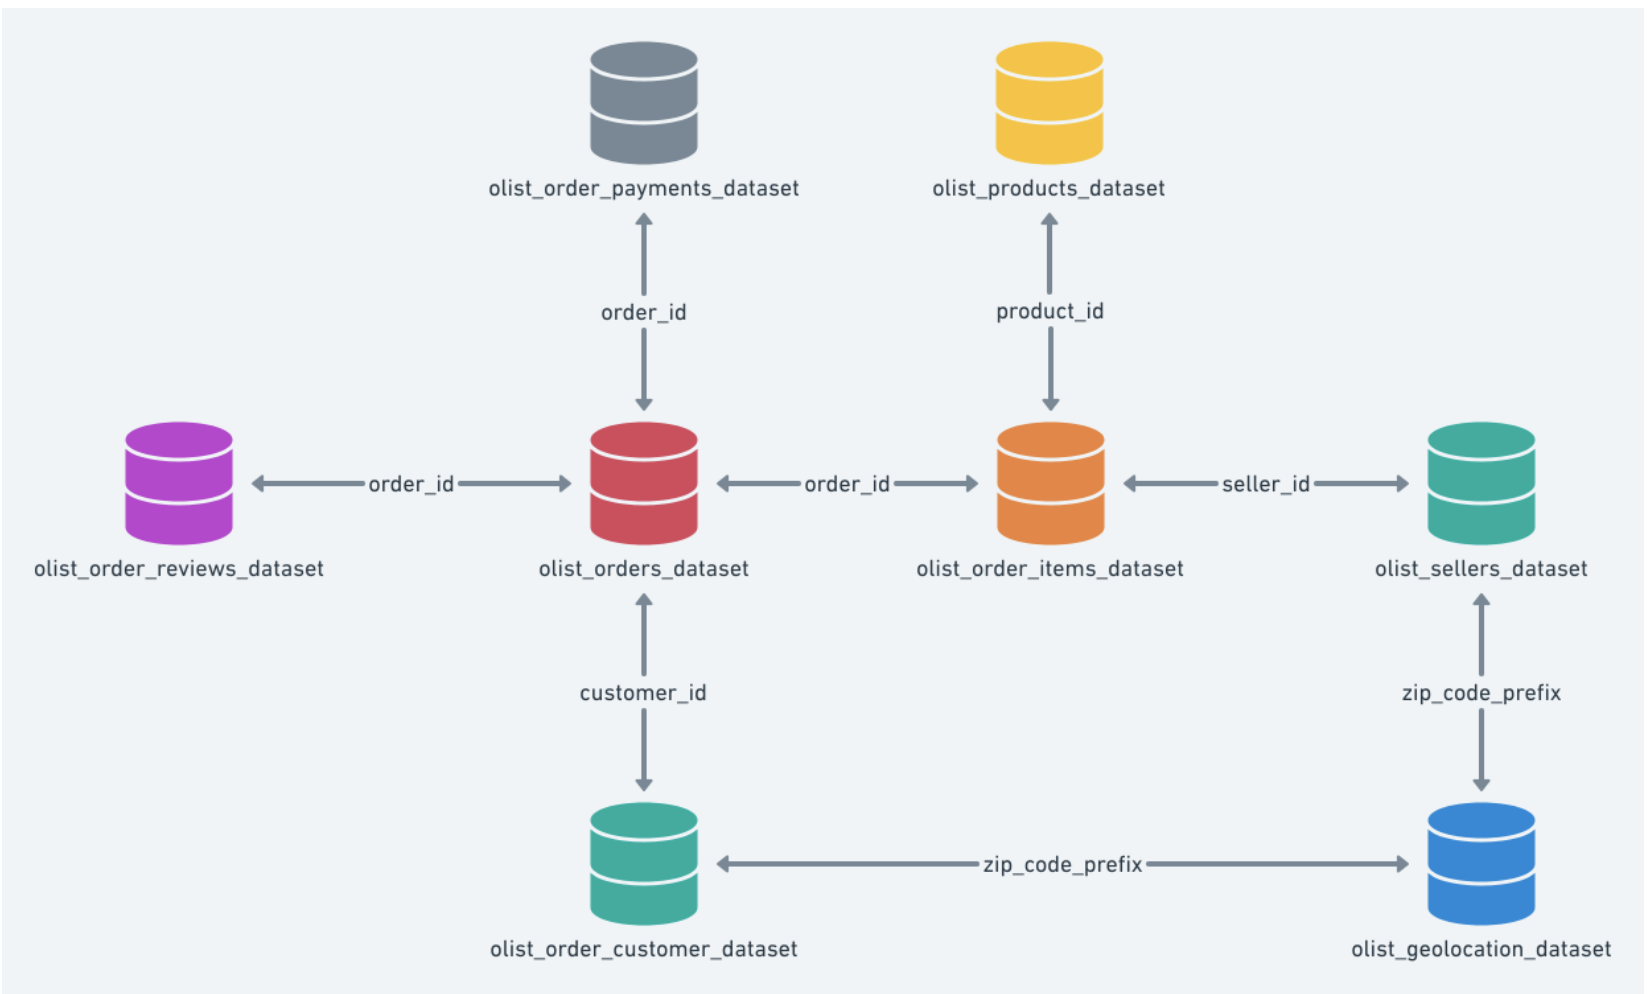

In [1]:
pip install haversine

In [2]:
# https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/code 해당 케글 사이트
import os
import pandas as pd

filenames = ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_items_dataset.csv',
             'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv',
             'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']

customers = pd.read_csv(filenames[0])#data.csv불러오기
geolocation = pd.read_csv(filenames[1])
items = pd.read_csv(filenames[2])
payments = pd.read_csv(filenames[3])
reviews = pd.read_csv(filenames[4])
orders = pd.read_csv(filenames[5])
products = pd.read_csv(filenames[6])
sellers = pd.read_csv(filenames[7])
product_category = pd.read_csv(filenames[8])

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# order_id merge전 중복행 제거! 
items = items.drop_duplicates('order_id')
payments = payments.drop_duplicates('order_id')
reviews = reviews.drop_duplicates('order_id')
orders = orders.drop_duplicates('order_id')

In [5]:
# merge를 이용하여 데이터 합치기

orders = orders.merge(customers, on = 'customer_id')
orders = orders.merge(reviews, on = 'order_id')
orders = orders.merge(payments, on = 'order_id')
items = items.merge(products, on = 'product_id')
items = items.merge(sellers, on = 'seller_id')
orders = orders.merge(items, on = 'order_id')

In [6]:
import numpy as np

# 상표이름 스페인어에서 영어로 만드는 함수
category_list = np.array(product_category)
def spa_eng(x):
  for i in category_list:
    x = x.replace(i[0], i[1])
  return x

In [7]:
orders['product_category_name'] = spa_eng(orders.product_category_name) # Spainish -> English

In [8]:
customers.duplicated('customer_zip_code_prefix').sum(), sellers.duplicated('seller_zip_code_prefix').sum()

(84447, 849)

In [9]:
orders.product_category_name.value_counts()

bed_bath_table               9311
health_beauty                8795
sports_leisure               7681
computers_accessories        6660
furniture_decor              6355
                             ... 
la_cuisine                     12
cds_dvds_musicals              12
fashion_childrens_clothes       8
pc_gamer                        7
security_and_services           2
Name: product_category_name, Length: 73, dtype: int64

In [10]:
geolocation = geolocation.drop_duplicates(['geolocation_zip_code_prefix', 'geolocation_state'])
orders = orders.merge(geolocation, left_on = ['customer_zip_code_prefix', 'customer_city', 'customer_state'], 
                      right_on = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
orders = orders.drop(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], axis = 1)

orders = orders.merge(geolocation, left_on = ['seller_zip_code_prefix', 'seller_city', 'seller_state'],
                      right_on = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
orders = orders.drop(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], axis = 1)

In [11]:
def tofloat(x):
  return float(x)
orders['geolocation_lat_x'] = orders['geolocation_lat_x'].apply(tofloat)
orders['geolocation_lng_x'] = orders['geolocation_lng_x'].apply(tofloat)
orders['geolocation_lat_y'] = orders['geolocation_lat_y'].apply(tofloat)
orders['geolocation_lng_y'] = orders['geolocation_lng_y'].apply(tofloat)

In [12]:
orders.product_id.value_counts()

99a4788cb24856965c36a24e339b6058    408
aca2eb7d00ea1a7b8ebd4e68314663af    400
422879e10f46682990de24d770e7f83d    319
d1c427060a0f73f6b889a5c7c61f2ac4    299
53b36df67ebb7c41585e8d54d6772e08    275
                                   ... 
a846839e8367f61f140f082e5ffef625      1
daf7ec5956e0377c86e427d04ba0e315      1
9b191ab94826390cd135c837fb7bc881      1
9fc96a5f44c80640e0ad172c9ff13703      1
80d63636780c5975e5c93b63236d481d      1
Name: product_id, Length: 26979, dtype: int64

In [13]:
from haversine import haversine, Unit

distance_compare_list = []
customer_distance = []
seller_distance = []

for i in range(orders.shape[0]):
  customer = (orders['geolocation_lat_x'][i], orders['geolocation_lng_x'][i])
  seller = (orders['geolocation_lat_y'][i], orders['geolocation_lng_y'][i])
  result = haversine(customer, seller, unit = 'km')

  distance_compare_list.append(result)
  customer_distance.append(customer)
  seller_distance.append(seller)

In [14]:
orders['distance_compare'] = pd.DataFrame({'distance_compare' : distance_compare_list})

In [15]:
orders.distance_compare

0          18.063862
1         475.873906
2         116.322481
3          29.901922
4         423.003256
            ...     
81497    1582.772588
81498    1224.064569
81499     906.289466
81500     934.321689
81501    1760.379388
Name: distance_compare, Length: 81502, dtype: float64

In [16]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_lat_y',
       'geolocation_lng

In [17]:
orders.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   13
order_delivered_carrier_date       823
order_delivered_customer_date     1798
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             72020
review_comment_message           47522
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [18]:
orders.product_category_name.value_counts()

bed_bath_table               8059
health_beauty                6823
sports_leisure               6270
computers_accessories        5841
furniture_decor              5370
                             ... 
la_cuisine                     11
cds_dvds_musicals              10
fashion_childrens_clothes       8
pc_gamer                        7
security_and_services           2
Name: product_category_name, Length: 73, dtype: int64

In [19]:
health_beauty = orders[orders.product_category_name == 'health_beauty']
health_beauty.shape

(6823, 44)

In [20]:
health_beauty[health_beauty.distance_compare == 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,geolocation_lat_y,geolocation_lng_y,distance_compare
57856,4d5e865e4b64c8b33f8a81fd14731344,1227e78bfc2760c165324d240e2d9ff0,delivered,2018-04-20 14:54:15,2018-04-24 19:20:25,2018-04-21 00:28:54,2018-04-23 14:35:02,2018-04-30 00:00:00,0c184b7e23f30243d8957a97ce6af3f8,80230,...,16.0,18.0,80230,curitiba,PR,-25.440412,-49.272815,-25.440412,-49.272815,0.0
63797,6a87a0371f263aa8c1779c2c115c1427,4dbe5e9eb8cc354eb79fa6e9971d0a3d,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,377c26c9b730b15b237991e2ec5a04d3,35570,...,10.0,15.0,35570,formiga,MG,-20.474084,-45.424321,-20.474084,-45.424321,0.0
63798,fd090af4abab8284bf7d35b41d2075ce,5e0ab02d8c43402944f39559568c9c71,delivered,2018-01-23 09:07:31,2018-01-23 09:13:22,2018-01-24 15:24:58,2018-01-25 20:32:51,2018-02-07 00:00:00,a1c970de5f0783835ce5c0b430f77914,35570,...,10.0,15.0,35570,formiga,MG,-20.474084,-45.424321,-20.474084,-45.424321,0.0


In [21]:
bed_bath_table = orders[orders.product_category_name == 'bed_bath_table']
bed_bath_table.shape

(8059, 44)

In [22]:
# 구매자와 판매자 최소거리
# distance_compare_list = []
# distance_min_list = []

# for i in range(bed_bath_table.shape[0]):
#   for j in range(bed_bath_table.shape[0]):
#     customer = (bed_bath_table['geolocation_lat_x'].iloc[i], bed_bath_table['geolocation_lng_x'].iloc[i])
#     seller = (bed_bath_table['geolocation_lat_y'].iloc[j], bed_bath_table['geolocation_lng_y'].iloc[j])
#     result = haversine(customer, seller, unit = 'km')

#     distance_compare_list.append(result)
#     if np.array(result) == np.array(distance_compare_list).min():
#       location = j
#   distance_min_list.append(bed_bath_table.iloc[location]['seller_id'])

In [23]:
# bed_bath_table['new_seller_id'] = pd.DataFrame({'new_seller_id' : distance_min_list})

In [24]:
def review_like_unlike(x):
  if x > 3:
    x = 1
  else:
    x = 0
  return x
orders.review_score = orders.review_score.apply(review_like_unlike)

In [25]:
# 소비자, 판매자 위도, 경도 열 제거
orders = orders.drop(['geolocation_lat_x', 'geolocation_lng_x', 'geolocation_lat_y',
       'geolocation_lng_y'], axis = 1)

#**문제정의**  
**Review Score는 구매자가 상품을 구매하기전에 고려하는 아주 중요한 상황이다. 그러므로 판매자입장에서 Review Score 분석하는것이 그 무엇 보다 중요하다. 타겟 Review Scores는 1-5으로 나누어져있지만 4-5점은 1로 1-3점은 0으로 긍정적/부정적인 의미로 분류로 나뉘었다.어떤 조건들이 Review Score에 영향을 줄까?**

**1. 주문한 시간과 상품도착한 시간이 리뷰점수에 영향을줄까?**   
**2. 상품의 종류에 따라 리뷰점수가 다를까?**  
**3. 운임가격에 따라 리뷰점수가 달라질까?**  
**4. 상품의 크기에 따라 리뷰점수가 달라질까?**  
**5. 원가와 상품가격의 차에따라 리뷰점수가 달라질까?**  
**6. 제품 도착날짜와 주문날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**7. 리뷰작성날짜와 리뷰답변날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**8. 제품 승인날짜와 제품 운반날짜의 차이가 리뷰 점수에 영향을 줄까?**



In [26]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare'],
      dtype='object')

#**데이터 전처리, EDA, 시각화**  

In [27]:
#결측치 확인!
orders.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   13
order_delivered_carrier_date       823
order_delivered_customer_date     1798
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             72020
review_comment_message           47522
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [28]:
# 결측치 컬럼 review_comment_title, review_comment_message 제외하고 drop!
orders = orders.dropna(axis = 0, subset = ['order_approved_at', 
                                  'order_delivered_carrier_date', 
                                  'order_delivered_customer_date',
                                  'product_category_name',
                                  'product_name_lenght',
                                  'product_description_lenght',
                                  'product_photos_qty',
                                  'product_weight_g',
                                  'product_length_cm',
                                  'product_height_cm',
                                  'product_width_cm'])

In [29]:
#결측치제거 확인!
orders.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             69334
review_comment_message           46230
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [30]:
# comment, title 제외 데이터프레임 분류, order_item_id제거(의미없는 데이터)
df = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score',
       'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare']].copy()

In [31]:
df.shape

(78511, 37)

In [32]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,distance_compare
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,18.063862
1,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,delivered,2017-08-07 12:13:26,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17 18:24:38,2017-08-29 00:00:00,3b63e7ae5d6058eb51567425722cff95,35400,...,537.0,2.0,1850.0,34.0,5.0,34.0,9350,maua,SP,475.873906
2,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,delivered,2017-09-06 09:52:11,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16 16:19:28,2017-09-19 00:00:00,082d6b71dce3485197b2204a0462acff,13186,...,537.0,2.0,1800.0,34.0,5.0,34.0,9350,maua,SP,116.322481
3,25148bab087c1b9453abd98860a89993,7f36f0157804b66666fe74cdbde2f1e4,delivered,2017-06-21 17:59:41,2017-06-22 02:10:29,2017-06-26 09:57:02,2017-06-27 21:05:30,2017-07-04 00:00:00,897201fd314cec3487c3ff875f081b0c,5634,...,1158.0,2.0,400.0,30.0,10.0,30.0,9350,maua,SP,29.901922
4,39e9813f11fbc948f71cfaf189976662,355474d121f6ea4623bbf34bbe80739b,delivered,2017-04-24 09:37:26,2017-04-26 09:37:59,2017-04-28 09:14:05,2017-05-11 20:16:48,2017-05-16 00:00:00,68ba0fa3c02bfada4ebd0f37d1aee37f,88302,...,561.0,2.0,553.0,18.0,9.0,15.0,9350,maua,SP,423.003256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81495,70807adf40446c39c3504cd513bcf3aa,fff200ad56bd3e1caa576cce9d282672,delivered,2017-02-12 20:42:26,2017-02-12 20:50:16,2017-02-13 08:57:55,2017-03-01 10:05:22,2017-03-23 00:00:00,7a0617df6cb8666f6db83a8d9786746d,79006,...,628.0,1.0,2650.0,52.0,13.0,32.0,86990,marialva,PR,445.484755
81497,9277c21000c5426f4de2158dd377a676,92cac5e07ef9d027b0a07d442053d53c,delivered,2018-07-11 16:07:05,2018-07-11 16:26:38,2018-07-12 11:49:00,2018-07-26 03:11:45,2018-08-15 00:00:00,d9e0d7045a70874719841cfd398bb034,68682,...,540.0,4.0,1100.0,39.0,12.0,28.0,74590,goiania,GO,1582.772588
81498,4442d1fdf454197e9e141f0d83a9031e,3c3c45651f50bb4b13a4de268cad02b0,delivered,2017-02-03 18:08:16,2017-02-04 07:01:55,2017-02-20 10:49:53,2017-03-01 11:24:45,2017-03-06 00:00:00,9aed28a7d5e85a3f48fd4a23647dc8c4,97575,...,662.0,2.0,10800.0,55.0,18.0,19.0,7176,guarulhos,SP,1224.064569
81500,a37e262a26000281d0ade3b4eb1ce1e6,d0602b514179e7ed50e801cc02769bac,delivered,2018-08-06 23:14:27,2018-08-06 23:25:19,2018-08-07 14:16:00,2018-08-13 19:08:40,2018-08-22 00:00:00,ce05c653348a8e630ebbb1fd1e0968d2,74080,...,1469.0,4.0,550.0,36.0,8.0,15.0,20931,rio de janeiro,RJ,934.321689


In [33]:
df['review_score'].value_counts(normalize = True)

1    0.783877
0    0.216123
Name: review_score, dtype: float64

In [34]:
df.corr()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,distance_compare
customer_zip_code_prefix,1.000000,-0.013407,-0.004226,0.053392,0.053864,0.040063,0.221238,0.011461,0.025452,0.020381,0.003705,0.008706,0.007353,-0.007517,0.075933,0.481002
review_score,-0.013407,1.000000,0.001688,-0.031653,-0.033503,0.000712,-0.031037,-0.010640,0.018473,0.013126,-0.025996,-0.021012,-0.016224,-0.013864,0.027578,-0.048320
payment_sequential,-0.004226,0.001688,1.000000,-0.058478,-0.040520,0.003870,0.009781,0.003248,-0.002864,-0.003834,0.007101,0.008944,0.008310,0.009041,-0.001898,0.002302
payment_installments,0.053392,-0.031653,-0.058478,1.000000,0.316505,0.307518,0.203469,0.020701,0.039805,-0.001809,0.192328,0.121949,0.123205,0.144877,0.039026,0.089160
payment_value,0.053864,-0.033503,-0.040520,0.316505,1.000000,0.902436,0.453464,0.008149,0.181074,0.024116,0.355297,0.155058,0.233524,0.173904,0.090490,0.105047
price,0.040063,0.000712,0.003870,0.307518,0.902436,1.000000,0.423374,0.009772,0.198682,0.041952,0.335929,0.139397,0.216484,0.166026,0.088267,0.084102
freight_value,0.221238,-0.031037,0.009781,0.203469,0.453464,0.423374,1.000000,0.023870,0.092495,0.021489,0.623467,0.312680,0.388224,0.323425,0.157170,0.388808
product_name_lenght,0.011461,-0.010640,0.003248,0.020701,0.008149,0.009772,0.023870,1.000000,0.083945,0.138045,0.026237,0.058109,-0.021433,0.070377,-0.051340,0.014832
product_description_lenght,0.025452,0.018473,-0.002864,0.039805,0.181074,0.198682,0.092495,0.083945,1.000000,0.112689,0.053650,-0.002465,0.072175,-0.077269,0.062031,0.040512
product_photos_qty,0.020381,0.013126,-0.003834,-0.001809,0.024116,0.041952,0.021489,0.138045,0.112689,1.000000,0.026912,0.043279,-0.033548,0.006950,-0.058252,0.016424


In [35]:
df['order_status'].value_counts(normalize = True)

delivered    0.999949
canceled     0.000051
Name: order_status, dtype: float64

In [36]:
df['order_status'].value_counts(normalize = True)

delivered    0.999949
canceled     0.000051
Name: order_status, dtype: float64

In [37]:
df['customer_city'].value_counts(normalize = True)

sao paulo                 0.142120
rio de janeiro            0.073289
belo horizonte            0.030200
curitiba                  0.017068
brasilia                  0.015883
                            ...   
araguaia                  0.000013
sao geraldo da piedade    0.000013
sao jose do serido        0.000013
severiano melo            0.000013
itape                     0.000013
Name: customer_city, Length: 3641, dtype: float64

In [38]:
df['customer_state'].value_counts(normalize = True)

SP    0.409599
RJ    0.130580
MG    0.124148
RS    0.057559
PR    0.053687
SC    0.035982
BA    0.034759
ES    0.021322
GO    0.019271
PE    0.017564
DF    0.015896
CE    0.014164
PA    0.009922
MT    0.008903
MS    0.007413
MA    0.007311
RN    0.005006
PB    0.005006
PI    0.004955
AL    0.004127
SE    0.003706
TO    0.002917
RO    0.002624
AM    0.001579
AC    0.000866
AP    0.000713
RR    0.000420
Name: customer_state, dtype: float64

In [39]:
df['payment_sequential'].value_counts(normalize = True)

1     0.983671
2     0.013476
3     0.001618
4     0.000522
5     0.000229
6     0.000178
7     0.000102
8     0.000076
10    0.000051
9     0.000013
19    0.000013
15    0.000013
14    0.000013
17    0.000013
11    0.000013
Name: payment_sequential, dtype: float64

In [40]:
df['payment_installments'].value_counts(normalize = True)

1     0.483410
2     0.123944
3     0.105068
4     0.071570
10    0.053381
5     0.052872
8     0.044007
6     0.039701
7     0.015934
9     0.006509
12    0.001337
15    0.000790
18    0.000306
11    0.000229
20    0.000191
13    0.000191
24    0.000191
14    0.000127
17    0.000089
16    0.000064
21    0.000038
0     0.000025
23    0.000013
22    0.000013
Name: payment_installments, dtype: float64

In [41]:
df['product_category_name'].value_counts(normalize = True)

bed_bath_table                                   0.101132
health_beauty                                    0.085045
sports_leisure                                   0.077849
computers_accessories                            0.072614
furniture_decor                                  0.066870
                                                   ...   
cds_dvds_musicals                                0.000127
portateis_cozinha_e_preparadores_de_alimentos    0.000127
fashion_childrens_clothes                        0.000089
pc_gamer                                         0.000076
security_and_services                            0.000025
Name: product_category_name, Length: 73, dtype: float64

In [42]:
df['seller_city'].value_counts(normalize = True)

sao paulo                0.228516
ibitinga                 0.074741
curitiba                 0.030301
santo andre              0.027678
belo horizonte           0.025563
                           ...   
erechim                  0.000013
ivoti                    0.000013
sao joao da boa vista    0.000013
uruguaiana               0.000013
abadia de goias          0.000013
Name: seller_city, Length: 490, dtype: float64

In [43]:
df['seller_state'].value_counts(normalize = True)

SP    0.697864
MG    0.087924
PR    0.086243
SC    0.039421
RJ    0.039039
RS    0.021857
BA    0.006076
DF    0.005401
PE    0.004318
GO    0.003898
ES    0.003554
MT    0.001630
CE    0.000968
RN    0.000611
MS    0.000509
PB    0.000369
PI    0.000140
SE    0.000089
RO    0.000051
AM    0.000038
Name: seller_state, dtype: float64

In [44]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare'],
      dtype='object')

In [45]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

In [46]:
df['order_deliver_diff'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['order_estimated_diff'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['review_diff'] = df['review_answer_timestamp'] - df['review_creation_date']
df['carrier_diff'] = df['order_delivered_carrier_date'] - df['order_approved_at']

In [47]:
# + 1days
def order_days(x):
  return x.days + 1

In [48]:
df['order_deliver_diff'] = df['order_deliver_diff'].apply(order_days)
df['order_estimated_diff'] = df['order_estimated_diff'].apply(order_days)
df['review_diff'] = df['review_diff'].apply(order_days)
df['carrier_diff'] = df['carrier_diff'].apply(order_days)

In [49]:
df['order_deliver_diff'] 

0         9
1        11
2        11
3         7
4        18
         ..
81495    17
81497    15
81498    26
81500     7
81501    25
Name: order_deliver_diff, Length: 78511, dtype: int64

In [50]:
df['order_purchase_timestamp']

0       2017-10-02 10:56:33
1       2017-08-07 12:13:26
2       2017-09-06 09:52:11
3       2017-06-21 17:59:41
4       2017-04-24 09:37:26
                ...        
81495   2017-02-12 20:42:26
81497   2018-07-11 16:07:05
81498   2017-02-03 18:08:16
81500   2018-08-06 23:14:27
81501   2017-07-02 13:10:36
Name: order_purchase_timestamp, Length: 78511, dtype: datetime64[ns]

In [51]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare', 'order_deliver_diff', 'order_estimated_diff',
       'review_diff', 'carrier_diff'],
      dtype='object')

In [52]:
df['margin'] = df['payment_value'] - df['price']

In [53]:
# 원가보다 높은 가격이 이상해서 이상치 제거
df = df[df.margin > 0]
df = df.reset_index()
df = df.drop('index', axis = 1)

In [58]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare', 'order_deliver_diff', 'order_estimated_diff',
       'review_diff', 'carrier_diff', 'margin'],
      dtype='object')

In [ ]:
df.info()

In [72]:
df['payment_sequential'].value_counts()

1     76006
2       368
3         4
4         2
17        1
Name: payment_sequential, dtype: int64

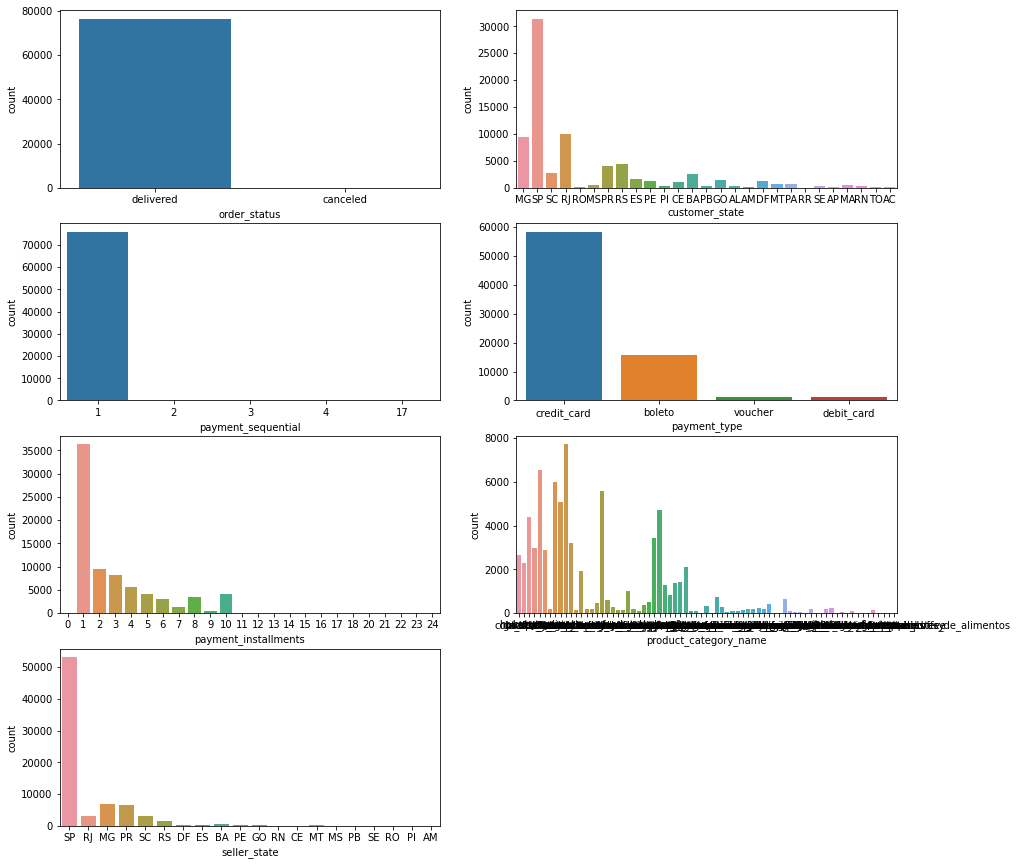

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['order_status', 'customer_state', 
            'payment_sequential','payment_type', 'payment_installments',
            'product_category_name', 'seller_state']
plt.figure(figsize = (15, 15))

for i in range(len(features)):
    ax = plt.subplot(4, 2, i + 1)
    sns.countplot(x = features[i], data = df)
plt.show()

In [73]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,distance_compare,order_deliver_diff,order_estimated_diff,review_diff,carrier_diff,margin
0,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,delivered,2017-08-07 12:13:26,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17 18:24:38,2017-08-29,3b63e7ae5d6058eb51567425722cff95,35400,...,34.0,9350,maua,SP,475.873906,11,12,6,2,15.10
1,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,delivered,2017-09-06 09:52:11,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16 16:19:28,2017-09-19,082d6b71dce3485197b2204a0462acff,13186,...,34.0,9350,maua,SP,116.322481,11,3,3,3,11.73
2,25148bab087c1b9453abd98860a89993,7f36f0157804b66666fe74cdbde2f1e4,delivered,2017-06-21 17:59:41,2017-06-22 02:10:29,2017-06-26 09:57:02,2017-06-27 21:05:30,2017-07-04,897201fd314cec3487c3ff875f081b0c,5634,...,30.0,9350,maua,SP,29.901922,7,7,3,5,7.81
3,39e9813f11fbc948f71cfaf189976662,355474d121f6ea4623bbf34bbe80739b,delivered,2017-04-24 09:37:26,2017-04-26 09:37:59,2017-04-28 09:14:05,2017-05-11 20:16:48,2017-05-16,68ba0fa3c02bfada4ebd0f37d1aee37f,88302,...,15.0,9350,maua,SP,423.003256,18,5,14,2,14.52
4,4246497ce0c7f8915544d27745f2e6c7,ec8cbe5ff3ae0f352870c07a3a3025d8,delivered,2017-07-22 19:26:25,2017-07-22 19:42:37,2017-07-25 22:16:31,2017-08-01 19:34:49,2017-08-15,51a59e5535d7248b0995d628d4e159d3,24933,...,30.0,9350,maua,SP,367.540013,11,14,2,4,20.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76376,70807adf40446c39c3504cd513bcf3aa,fff200ad56bd3e1caa576cce9d282672,delivered,2017-02-12 20:42:26,2017-02-12 20:50:16,2017-02-13 08:57:55,2017-03-01 10:05:22,2017-03-23,7a0617df6cb8666f6db83a8d9786746d,79006,...,32.0,86990,marialva,PR,445.484755,17,22,3,1,20.97
76377,9277c21000c5426f4de2158dd377a676,92cac5e07ef9d027b0a07d442053d53c,delivered,2018-07-11 16:07:05,2018-07-11 16:26:38,2018-07-12 11:49:00,2018-07-26 03:11:45,2018-08-15,d9e0d7045a70874719841cfd398bb034,68682,...,28.0,74590,goiania,GO,1582.772588,15,20,1,1,58.04
76378,4442d1fdf454197e9e141f0d83a9031e,3c3c45651f50bb4b13a4de268cad02b0,delivered,2017-02-03 18:08:16,2017-02-04 07:01:55,2017-02-20 10:49:53,2017-03-01 11:24:45,2017-03-06,9aed28a7d5e85a3f48fd4a23647dc8c4,97575,...,19.0,7176,guarulhos,SP,1224.064569,26,5,2,17,24.79
76379,a37e262a26000281d0ade3b4eb1ce1e6,d0602b514179e7ed50e801cc02769bac,delivered,2018-08-06 23:14:27,2018-08-06 23:25:19,2018-08-07 14:16:00,2018-08-13 19:08:40,2018-08-22,ce05c653348a8e630ebbb1fd1e0968d2,74080,...,15.0,20931,rio de janeiro,RJ,934.321689,7,9,2,1,17.55


**피쳐의 분포확인(이상치확인)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


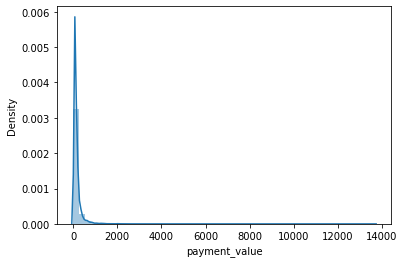

In [75]:
sns.distplot(df.payment_value)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


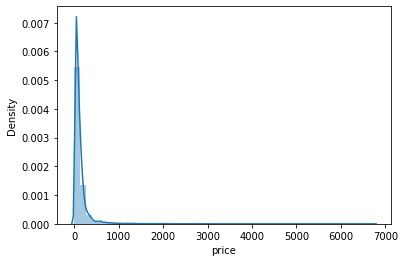

In [76]:
sns.distplot(df.price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


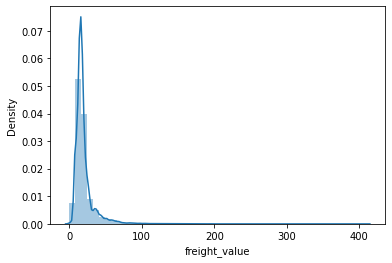

In [77]:
sns.distplot(df.freight_value)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


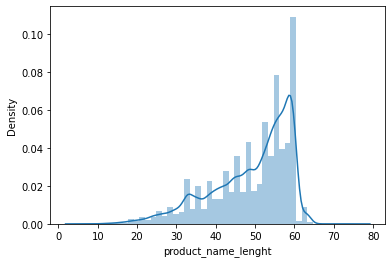

In [78]:
sns.distplot(df.product_name_lenght)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


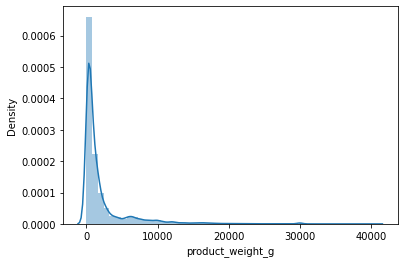

In [79]:
sns.distplot(df.product_weight_g)

**세운가설과 시각화결과를 제시**
  
**1. 상품의 종류에 따라 리뷰점수가 다를까?**  
**2. 운임가격에 따라 리뷰점수가 달라질까?**  
**3. 상품의 크기에 따라 리뷰점수가 달라질까?**  
**4. 원가와 상품가격의 차에따라 리뷰점수가 달라질까?**  
**5. 제품 도착날짜와 주문날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**6. 리뷰작성날짜와 리뷰답변날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**7. 제품 승인날짜와 제품 운반날짜의 차이가 리뷰 점수에 영향을 줄까?**

In [81]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare', 'order_deliver_diff', 'order_estimated_diff',
       'review_diff', 'carrier_diff', 'margin'],
      dtype='object')

In [136]:
df_product_category_name = df.groupby('product_category_name').review_score.value_counts(normalize = True)[:20]

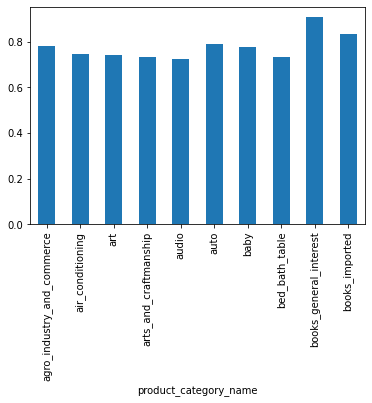

In [137]:
# 카테고리 상위 10개의 제품 비교
df_product_category_name[:,1].plot.bar();

In [149]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare', 'order_deliver_diff', 'order_estimated_diff',
       'review_diff', 'carrier_diff', 'margin'],
      dtype='object')

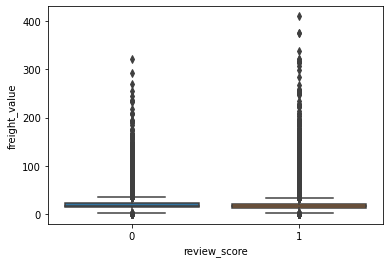

In [151]:
sns.boxplot(x = df.review_score, y = df.freight_value);

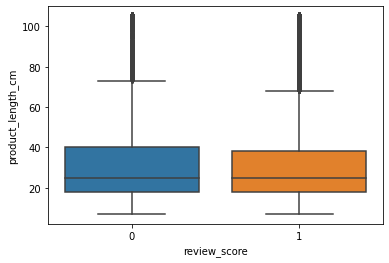

In [152]:
sns.boxplot(x = df.review_score, y = df.product_length_cm);

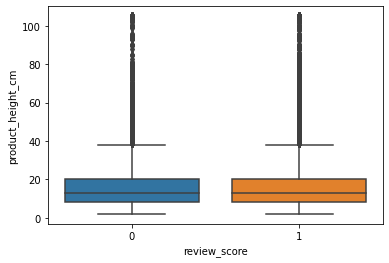

In [153]:
sns.boxplot(x = df.review_score, y = df.product_height_cm);

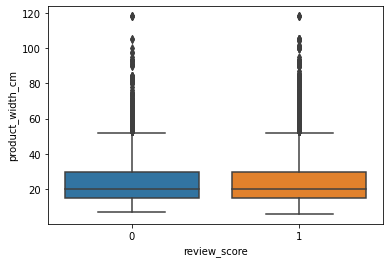

In [154]:
sns.boxplot(x = df.review_score, y = df.product_width_cm);

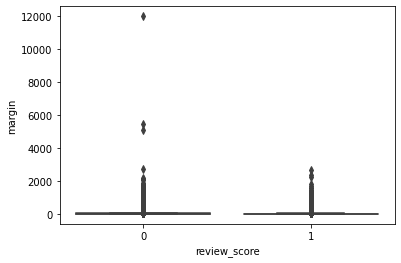

In [156]:
sns.boxplot(x= df.review_score , y = df.margin);

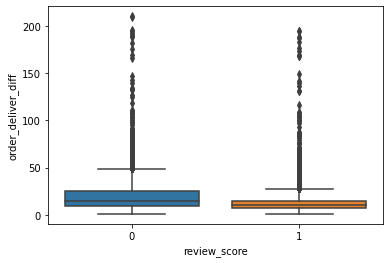

In [157]:
sns.boxplot(x= df.review_score , y = df.order_deliver_diff);

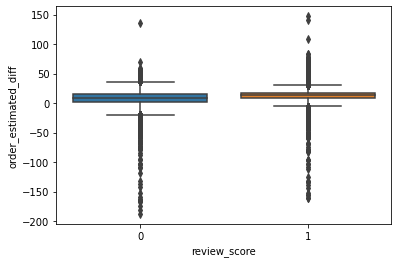

In [158]:
sns.boxplot(x= df.review_score , y = df.order_estimated_diff);

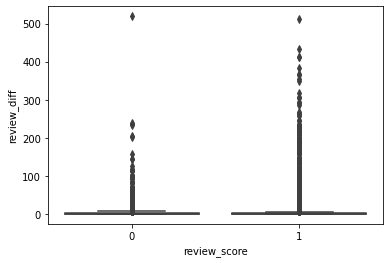

In [159]:
sns.boxplot(x= df.review_score , y = df.review_diff);	

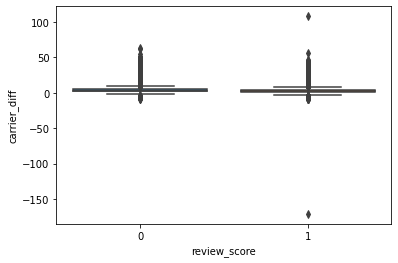

In [161]:
sns.boxplot(x= df.review_score , y = df.carrier_diff);	